- Implementation backlog
    - closed form solution
        - include l2 norm regularization too
    - gradient descent
        - include all the tricks used by adam
        - include l1 norm and subgradient too
- Analysis steps
    - Test correctness: home grown implementation should give the same results as the equivalent scikit learn implementation
    - Test performance: plot time taken by home grown implementation vs scikit learn implementation for different input size
    - write the theoretical time complexity and comment on whether the empirical results match the theoretical results

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import importlib
import hg_linear_regression as hg_lr

_ = importlib.reload(hg_lr)

In [3]:
# Load the house price dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Max difference between scikit learn and hand written model: 9.509056736701346
Intercepts: 2.066917263986298, 2.0667607978800158


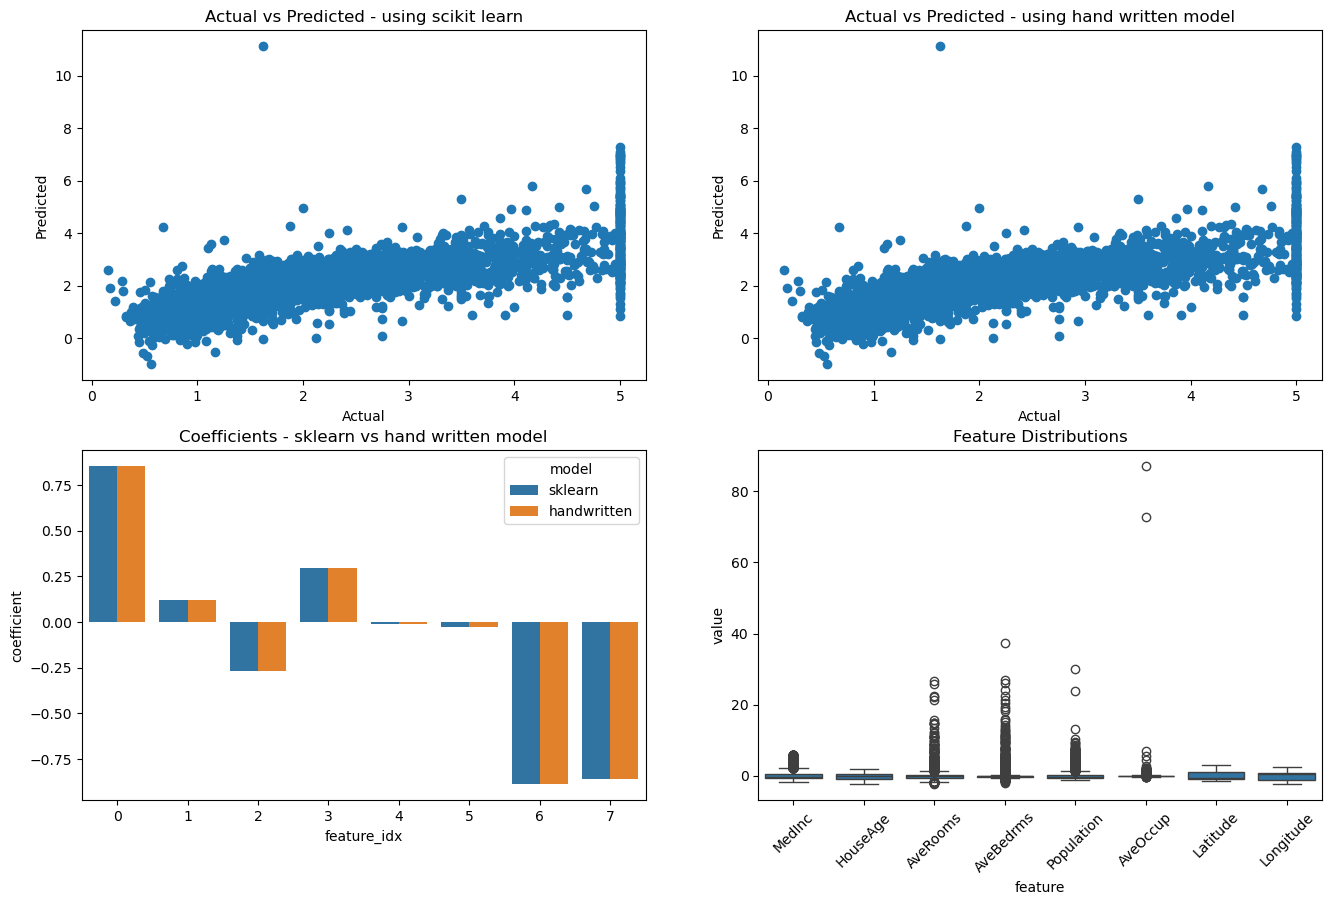

In [11]:
# Test correctness of closed form solution using sklearn
alpha = 1.0
ref_model = Ridge(alpha = alpha)
ref_model.fit(X_train, y_train)
y_pred = ref_model.predict(X_test)

# scatter plot of predicted vs actual
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# scatter plot of predicted vs actual
ax[0, 0].scatter(y_test, y_pred)
ax[0, 0].set_xlabel('Actual'); ax[0, 0].set_ylabel('Predicted'); ax[0, 0].set_title('Actual vs Predicted - using scikit learn')

# filt the model using the closed form solution
hg_model = hg_lr.LinearRegression(alpha = alpha)
hg_model.fit(X_train, y_train)
y_pred = hg_model.predict(X_test)

print (f"Max difference between scikit learn and hand written model: {np.max(np.abs(y_pred - y_test))}")

# scatter plot of predicted vs actual
ax[0, 1].scatter(y_test, y_pred)
ax[0, 1].set_xlabel('Actual'); ax[0, 1].set_ylabel('Predicted'); ax[0, 1].set_title('Actual vs Predicted - using hand written model')

print (f"Intercepts: {ref_model.intercept_}, {hg_model.intercept_}")

# plot the coefficients side-by-side as a bar plot using sne heu = model type
pdf = list(zip(ref_model.coef_, hg_model.coef_))
pdf = pd.DataFrame(pdf, columns = ['sklearn', 'handwritten'])
pdf['feature_idx'] = range(len(pdf))
pdf = pdf.melt(id_vars = 'feature_idx', var_name = 'model', value_name = 'coefficient')

sns.barplot(x = 'feature_idx', y = 'coefficient', hue = 'model', data = pdf, ax = ax[1, 0])
ax[1, 0].set_title('Coefficients - sklearn vs hand written model')

# show box plot of each feature in the final plot
pdf = pd.DataFrame(X_train, columns = data.feature_names)
pdf = pd.melt(pdf, var_name = 'feature', value_name = 'value')
sns.boxplot(x = 'feature', y = 'value', data = pdf, ax = ax[1, 1])
ax[1, 1].set_title('Feature Distributions')
for tick in ax[1, 1].get_xticklabels():
    tick.set_rotation(45)
plt.show()